In [ ]:
#Assess the financial health of companies and predict their future performance
#Logistic regression. Use revenue growth and EBITDA to classify companies into different performance categories

## Load CSV Files

In [12]:
#Import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

#Load CSV files
stk_stats = pd.read_csv('sp500_stocks.csv')
comp_stats = pd.read_csv('sp500_companies.csv')

# Data Cleaning and Preprocessing

In [13]:
#Merge both sets into one. Merge on 'Symbol'
merged_df = pd.merge(stk_stats, comp_stats, on='Symbol', how='inner')

# Define thresholds for EBITDA and Revenue growth
ebitda_thresholds = {'low': 50000000, 'moderate': 1000000000}
revenue_growth_thresholds = {'low': 0.02, 'moderate': 0.08}

# Classification function
def classify_company(row):
    if row['Ebitda'] >= ebitda_thresholds['moderate'] and row['Revenuegrowth'] >= revenue_growth_thresholds['moderate']:
        return 'healthy'
    elif ebitda_thresholds['low'] <= row['Ebitda'] < ebitda_thresholds['moderate'] and revenue_growth_thresholds['low'] <= row['Revenuegrowth'] < revenue_growth_thresholds['moderate']:
        return 'moderate'
    else:
        return 'risky'

# Apply classification to create Financial Health variable
merged_df['financial_health'] = merged_df.apply(classify_company, axis=1)

# # Preproccess x and y values for regression
X = merged_df[['Currentprice', 'High', 'Low', 'Open', 'Close']]
y = merged_df['financial_health']

# Build and Train Model

C:\Users\david\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7038804010859807
              precision    recall  f1-score   support

     healthy       0.48      0.05      0.09     95510
    moderate       0.06      0.00      0.00     13174
       risky       0.71      0.98      0.82    260015

    accuracy                           0.70    368699
   macro avg       0.41      0.34      0.30    368699
weighted avg       0.63      0.70      0.60    368699



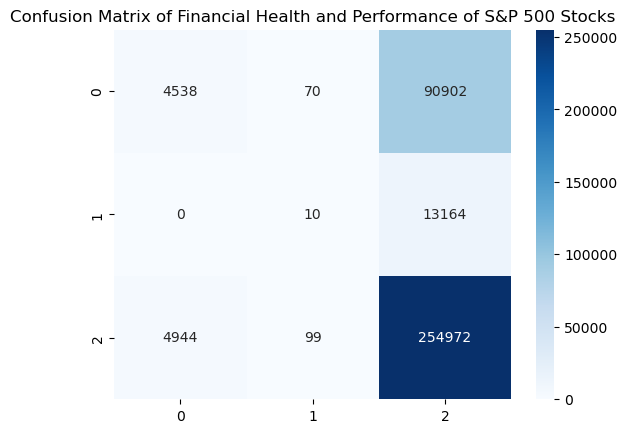

Coefficients: [[ 0.00146768 -0.03288074  0.02294491  0.01125428 -0.00179249]
 [-0.00117128  0.07186986 -0.08093518 -0.00072447  0.00882866]
 [-0.0002964  -0.03898912  0.05799027 -0.01052981 -0.00703617]]


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Financial Health and Performance of S&P 500 Stocks')
plt.show()

# Coefficients
coef = model.coef_
print("Coefficients:", coef)